### 拉格朗日有限元基函数计算展示代码 

In [49]:
def basis(self, bc, index=np.s_[:], p=None):
        """
        compute the basis function values at barycentric point bc

        Parameters
        ----------
        bc : numpy.ndarray
            the shape of `bc` can be `(TD+1,)` or `(NQ, TD+1)`
        Returns
        -------
        phi : numpy.ndarray
            the shape of 'phi' can be `(1, ldof)` or `(NQ, 1, ldof)`

        See Also
        --------

        Notes
        -----

        """
        if p is None:
            p = self.p

        if p == 0 and self.spacetype == 'D':
            shape = (len(bc.shape)+1)*(1, ) 
            print('shape:', shape)
            phi = np.ones(shape, dtype=self.ftype)

        TD = bc.shape[-1] - 1 
        multiIndex = self.multi_index_matrix[TD](p)

        c = np.arange(1, p+1, dtype=np.int_)
        P = 1.0/np.multiply.accumulate(c)
        t = np.arange(0, p)
        shape = bc.shape[:-1]+(p+1, TD+1)
        A = np.ones(shape, dtype=self.ftype)
        A[..., 1:, :] = p*bc[..., np.newaxis, :] - t.reshape(-1, 1)
        np.cumprod(A, axis=-2, out=A)
        A[..., 1:, :] *= P.reshape(-1, 1)
        idx = np.arange(TD+1)
        phi = np.prod(A[..., multiIndex, idx], axis=-1)
        return phi[..., np.newaxis, :] # (..., 1, ldof)

In [52]:
mesh.entity_barycenter('cell')

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [51]:
basis(mesh,p=3)

TypeError: basis() missing 1 required positional argument: 'bc'

In [47]:
p=5
c = np.arange(1, p+1)
P = np.multiply.accumulate(c)
P_ = 1/P

In [48]:
print(c,P,P_)

[1 2 3 4 5] [  1   2   6  24 120] [1.         0.5        0.16666667 0.04166667 0.00833333]


### start!

In [49]:
import numpy as np
from fealpy.mesh import MeshFactory as MF
import matplotlib.pyplot as plt # 画图
domain=[0,1,0,1]
mesh=MF.boxmesh2d(domain,nx=1,ny=1,meshtype='tri')

run boxmesh2d with time: 0.0010654000000158703


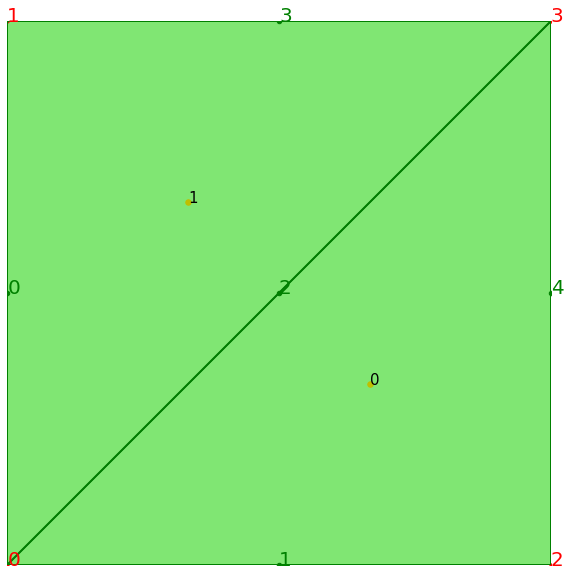

In [33]:
fig=plt.figure(figsize=(10,10))
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,showindex=True,fontsize=20)
mesh.find_edge(axes,showindex=True,fontsize=20)
mesh.find_cell(axes,showindex=True)
plt.show()

In [51]:
cell=mesh.entity('cell')
edge=mesh.entity('edge')
node=mesh.entity('node')
display(cell,edge,node,mesh.p)

array([[2, 3, 0],
       [1, 0, 3]])

array([[1, 0],
       [0, 2],
       [3, 0],
       [3, 1],
       [2, 3]])

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

1

In [52]:
# p=mesh.p
p=5
print(p,mesh.p)

5 1


In [53]:
TD=mesh.top_dimension()
bc=mesh.entity_barycenter('cell') # 重心坐标
display(bc,TD)

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

2

In [58]:
# construct vector P=(1/1!,1/2!,...,1/P!)
c=np.arange(1,p+1,dtype=np.int)
P=1/np.multiply.accumulate(c)

# construct the matrix A.
t=np.arange(0,p)
shape=bc.shape[:-1]+(p+1,TD)
A=np.ones(shape)
A[...,1:,:]=p*bc[...,np.newaxis,:]-t.reshape(-1,1)

In [59]:
A

array([[[ 1.        ,  1.        ],
        [ 3.33333333,  1.66666667],
        [ 2.33333333,  0.66666667],
        [ 1.33333333, -0.33333333],
        [ 0.33333333, -1.33333333],
        [-0.66666667, -2.33333333]],

       [[ 1.        ,  1.        ],
        [ 1.66666667,  3.33333333],
        [ 0.66666667,  2.33333333],
        [-0.33333333,  1.33333333],
        [-1.33333333,  0.33333333],
        [-2.33333333, -0.66666667]]])

In [61]:
# construct matrix B and here we still use the memory of A
np.cumprod(A,axis=-2,out=A)
A[...,1:,:]*=P.reshape(-1,1)

In [62]:
A

array([[[ 1.00000000e+00,  1.00000000e+00],
        [ 3.33333333e+00,  1.66666667e+00],
        [ 1.29629630e+01,  9.25925926e-01],
        [ 4.48102423e+01, -1.14311843e-01],
        [ 3.87249008e+01, -1.41125732e-02],
        [-1.78485139e+01,  3.25228024e-03]],

       [[ 1.00000000e+00,  1.00000000e+00],
        [ 1.66666667e+00,  3.33333333e+00],
        [ 9.25925926e-01,  1.29629630e+01],
        [-1.14311843e-01,  4.48102423e+01],
        [-1.41125732e-02,  3.87249008e+01],
        [ 3.25228024e-03, -1.78485139e+01]]])

In [43]:
t

array([0, 1, 2, 3, 4])

In [44]:
display(A,A[...,1:,:],p*bc[...,np.newaxis,:]-t.reshape(-1,1))

array([[[ 1.        ,  1.        ],
        [ 0.66666667,  0.33333333],
        [-0.33333333, -0.66666667],
        [-1.33333333, -1.66666667],
        [-2.33333333, -2.66666667],
        [-3.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 1.66666667,  0.33333333],
        [ 0.66666667, -0.66666667],
        [-0.33333333, -1.66666667],
        [-1.33333333, -2.66666667],
        [-2.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 2.66666667,  0.33333333],
        [ 1.66666667, -0.66666667],
        [ 0.66666667, -1.66666667],
        [-0.33333333, -2.66666667],
        [-1.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 3.66666667,  0.33333333],
        [ 2.66666667, -0.66666667],
        [ 1.66666667, -1.66666667],
        [ 0.66666667, -2.66666667],
        [-0.33333333, -3.66666667]],

       [[ 1.        ,  1.        ],
        [ 4.66666667,  0.33333333],
        [ 3.66666667, -0.66666667],
        [ 2.66666667

array([[[ 0.66666667,  0.33333333],
        [-0.33333333, -0.66666667],
        [-1.33333333, -1.66666667],
        [-2.33333333, -2.66666667],
        [-3.33333333, -3.66666667]],

       [[ 1.66666667,  0.33333333],
        [ 0.66666667, -0.66666667],
        [-0.33333333, -1.66666667],
        [-1.33333333, -2.66666667],
        [-2.33333333, -3.66666667]],

       [[ 2.66666667,  0.33333333],
        [ 1.66666667, -0.66666667],
        [ 0.66666667, -1.66666667],
        [-0.33333333, -2.66666667],
        [-1.33333333, -3.66666667]],

       [[ 3.66666667,  0.33333333],
        [ 2.66666667, -0.66666667],
        [ 1.66666667, -1.66666667],
        [ 0.66666667, -2.66666667],
        [-0.33333333, -3.66666667]],

       [[ 4.66666667,  0.33333333],
        [ 3.66666667, -0.66666667],
        [ 2.66666667, -1.66666667],
        [ 1.66666667, -2.66666667],
        [ 0.66666667, -3.66666667]],

       [[ 0.66666667,  1.33333333],
        [-0.33333333,  0.33333333],
        [-1.333333

array([[[ 0.66666667,  0.33333333],
        [-0.33333333, -0.66666667],
        [-1.33333333, -1.66666667],
        [-2.33333333, -2.66666667],
        [-3.33333333, -3.66666667]],

       [[ 1.66666667,  0.33333333],
        [ 0.66666667, -0.66666667],
        [-0.33333333, -1.66666667],
        [-1.33333333, -2.66666667],
        [-2.33333333, -3.66666667]],

       [[ 2.66666667,  0.33333333],
        [ 1.66666667, -0.66666667],
        [ 0.66666667, -1.66666667],
        [-0.33333333, -2.66666667],
        [-1.33333333, -3.66666667]],

       [[ 3.66666667,  0.33333333],
        [ 2.66666667, -0.66666667],
        [ 1.66666667, -1.66666667],
        [ 0.66666667, -2.66666667],
        [-0.33333333, -3.66666667]],

       [[ 4.66666667,  0.33333333],
        [ 3.66666667, -0.66666667],
        [ 2.66666667, -1.66666667],
        [ 1.66666667, -2.66666667],
        [ 0.66666667, -3.66666667]],

       [[ 0.66666667,  1.33333333],
        [-0.33333333,  0.33333333],
        [-1.333333

In [46]:
display(bc.shape[:-1]+(p+1,TD+1)) # 单元个数|插值函数次数加一|拓扑维数加一

(50, 6, 3)

### 重心坐标梯度的计算代码

In [30]:
# 源代码
domain=[0,1,0,1]
mesh=MF.boxmesh2d(domain,nx=1,ny=1,meshtype='tri')
NC=mesh.number_of_cells()

node=mesh.entity('node')
cell=mesh.entity('cell')
v0=node[cell[:,2],:]-node[cell[:,1],:] # x2-x1
v1=node[cell[:,0],:]-node[cell[:,2],:] # x0-x2
v2=node[cell[:,1],:]-node[cell[:,0],:] # x1-x0
nv=np.cross(v2,-v1)

Dlambda=np.zeros((NC,3,2))
length=nv
w=np.array([[0,1],[-1,0]])
Dlambda[:,0,:]=v0@w # /length.reshape[-1,1]
Dlambda[:,1,:]=v1@w # /length.reshape[-1,1]
Dlambda[:,2,:]=v2@w # /length.reshape[-1,1]

run boxmesh2d with time: 0.0016117999984999187


In [38]:
display(cell,cell[:,2],node,node[cell[:,2],:])

array([[2, 3, 0],
       [1, 0, 3]])

array([0, 3])

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

array([[0., 0.],
       [1., 1.]])

In [31]:
display(v2,-v1)

array([[ 0.,  1.],
       [ 0., -1.]])

array([[-1., -0.],
       [ 1., -0.]])

In [28]:
Dlambda

array([[[ 1., -1.],
        [ 0.,  1.],
        [-1.,  0.]],

       [[-1.,  1.],
        [ 0., -1.],
        [ 1.,  0.]]])

In [20]:
# np.cross(v2,-v1).reshape(-1,1)

array([[1.],
       [1.]])

In [18]:
display(length,Dlambda,v0,w)

array([1., 1.])

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

array([[-1., -1.],
       [ 1.,  1.]])

array([[ 0,  1],
       [-1,  0]])

### 10.05_第五次课_21_36

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

from fealpy.decorator import cartesian,barycentric
from fealpy.mesh import MeshFactory as mf
from fealpy.functionspace import LagrangeFiniteElementSpace

In [2]:
p=1

In [26]:
box=[0,1,0,1]
mesh=mf.boxmesh2d(box,nx=1,ny=1,meshtype='tri')

space=LagrangeFiniteElementSpace(mesh,p=p)
ldof=space.number_of_local_dofs()
gdof=space.number_of_global_dofs()
display(ldof,gdof)

# bc=np.array([[1/3,1/3,1/3]])
bc=np.array([[1,0,0],[0,1,0],[0,0,1],[0.5,0.5,0]])

phi=space.basis(bc)
gphi=space.grad_basis(bc)
print(bc.shape,phi.shape,gphi.shape)

# phi:重心坐标,单元,每个基函数
# gphi:重心坐标,单元,每个基函数,两个分量
multiIndex=space.dof.multiIndex
print(multiIndex)

run boxmesh2d with time: 0.00329779999992752


10

961

(4, 3) (4, 1, 10) (4, 200, 10, 2)
[[3 0 0]
 [2 1 0]
 [2 0 1]
 [1 2 0]
 [1 1 1]
 [1 0 2]
 [0 3 0]
 [0 2 1]
 [0 1 2]
 [0 0 3]]


#### 局部自由度与全局自由度对应关系

0 [ 3 23 12 24 41 11  4 13 14  0]
1 [ 6 37 26 38 42 25  7 27 28  3]
2 [ 4 29 18 30 43 17  5 19 20  1]
3 [ 7 39 32 40 44 31  8 33 34  4]
4 [ 1  9 17 10 45 18  0 14 13  4]
5 [ 4 24 31 23 46 32  3 28 27  7]
6 [ 2 15 22 16 47 21  1 20 19  5]
7 [ 5 30 36 29 48 35  4 34 33  8]


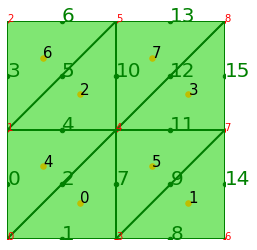

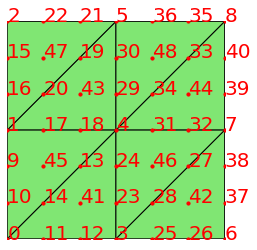

In [17]:
ipoints =space.interpolation_points()

cell2dof=space.cell_to_dof() # 每个单元 对应的 局部自由度的 全局编号
for i,var in enumerate(cell2dof):
    print(i,var)

fig=plt.figure()
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,showindex=True)
mesh.find_edge(axes,showindex=True,fontsize=20)
mesh.find_cell(axes,showindex=True)

fig=plt.figure()
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,node=ipoints,showindex=True,fontsize=20) # 
plt.show()

### LagrangeFiniteElementSpace 演示实例

In [19]:
ps=mesh.bc_to_point(bc)
print(ps) #(NQ,NC,2) 重心坐标变为直角坐标

[[[0.5  0.  ]
  [1.   0.  ]
  [0.5  0.5 ]
  [1.   0.5 ]
  [0.   0.5 ]
  [0.5  0.5 ]
  [0.   1.  ]
  [0.5  1.  ]]

 [[0.5  0.5 ]
  [1.   0.5 ]
  [0.5  1.  ]
  [1.   1.  ]
  [0.   0.  ]
  [0.5  0.  ]
  [0.   0.5 ]
  [0.5  0.5 ]]

 [[0.   0.  ]
  [0.5  0.  ]
  [0.   0.5 ]
  [0.5  0.5 ]
  [0.5  0.5 ]
  [1.   0.5 ]
  [0.5  1.  ]
  [1.   1.  ]]

 [[0.5  0.25]
  [1.   0.25]
  [0.5  0.75]
  [1.   0.75]
  [0.   0.25]
  [0.5  0.25]
  [0.   0.75]
  [0.5  0.75]]]


In [4]:
from fealpy.pde.poisson_2d import CosCosData

In [6]:
class CosCosData:
    """
        -\\Delta u = f
        u = cos(pi*x)*cos(pi*y)
    """
    def __init__(self):
        pass

    def domain(self):
        return np.array([0, 1, 0, 1])

    @cartesian
    def solution(self, p):
        """ The exact solution 
        Parameters
        ---------
        p : 


        Examples
        -------
        p = np.array([0, 1], dtype=np.float64)
        p = np.array([[0, 1], [0.5, 0.5]], dtype=np.float64)
        """
        x = p[..., 0]
        y = p[..., 1]
        pi = np.pi
        val = np.cos(pi*x)*np.cos(pi*y)
        return val # val.shape == x.shape


    @cartesian
    def source(self, p):
        """ The right hand side of Possion equation
        INPUT:
            p: array object,  
        """
        x = p[..., 0]
        y = p[..., 1]
        pi = np.pi
        val = 2*pi*pi*np.cos(pi*x)*np.cos(pi*y)
        return val

    @cartesian
    def gradient(self, p):
        """ The gradient of the exact solution 
        """
        x = p[..., 0]
        y = p[..., 1]
        pi = np.pi
        val = np.zeros(p.shape, dtype=np.float64)
        val[..., 0] = -pi*np.sin(pi*x)*np.cos(pi*y)
        val[..., 1] = -pi*np.cos(pi*x)*np.sin(pi*y)
        return val # val.shape == p.shape

    @cartesian
    def flux(self, p):
        return -self.gradient(p)

    @cartesian
    def dirichlet(self, p):
        return self.solution(p)

    @cartesian
    def is_dirichlet_boundary(self, p):
        y = p[..., 1]
        return ( y == 1.0) | ( y == 0.0)

In [7]:
pde=CosCosData()
print(pde.solution.coordtype)

cartesian


In [33]:
# 插值
uI=space.interpolation(pde.solution) # 是个有限元函数,同时也是个数组
print(uI[0:10])
print(len(uI),uI)
print()

[ 1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
  3.09016994e-01  6.12323400e-17 -3.09016994e-01 -5.87785252e-01
 -8.09016994e-01 -9.51056516e-01]
961 [ 1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
  3.09016994e-01  6.12323400e-17 -3.09016994e-01 -5.87785252e-01
 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00  9.51056516e-01
  9.04508497e-01  7.69420884e-01  5.59016994e-01  2.93892626e-01
  5.82354159e-17 -2.93892626e-01 -5.59016994e-01 -7.69420884e-01
 -9.04508497e-01 -9.51056516e-01  8.09016994e-01  7.69420884e-01
  6.54508497e-01  4.75528258e-01  2.50000000e-01  4.95380036e-17
 -2.50000000e-01 -4.75528258e-01 -6.54508497e-01 -7.69420884e-01
 -8.09016994e-01  5.87785252e-01  5.59016994e-01  4.75528258e-01
  3.45491503e-01  1.81635632e-01  3.59914664e-17 -1.81635632e-01
 -3.45491503e-01 -4.75528258e-01 -5.59016994e-01 -5.87785252e-01
  3.09016994e-01  2.93892626e-01  2.50000000e-01  1.81635632e-01
  9.54915028e-02  1.89218337e-17 -9.54915028e-02 -1.

#### 对于实际问题没有真解时,应该怎么办?

### 10-08 teach

## 插值误差

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# from fealpy.decorator import cartesian,barycentric
from fealpy.mesh import MeshFactory as mf
from fealpy.functionspace import LagrangeFiniteElementSpace

In [2]:
# 参数
p=1
n=10

run boxmesh2d with time: 0.0023027999995974824
uI[0:10]: [ 1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
  3.09016994e-01  6.12323400e-17 -3.09016994e-01 -5.87785252e-01
 -8.09016994e-01 -9.51056516e-01]
val0[0:10]: [ 0.951855    0.8431648   0.65193975  0.39689829  0.10300566 -0.20096987
 -0.48527308 -0.72207438 -0.888194   -0.96737101]
val1[0:10]: [[-4.89434837e-01 -4.65480191e-01]
 [-1.42039522e+00 -3.95961101e-01]
 [-2.21231742e+00 -2.87682579e-01]
 [-2.78768258e+00 -1.51243682e-01]
 [-3.09016994e+00 -2.99692403e-17]
 [-3.09016994e+00  1.51243682e-01]
 [-2.78768258e+00  2.87682579e-01]
 [-2.21231742e+00  3.95961101e-01]
 [-1.42039522e+00  4.65480191e-01]
 [-4.89434837e-01  4.89434837e-01]]
L2: 0.009996870787215945 H1: 0.3472265410116154


C:\Users\admin\AppData\Local\Temp/ipykernel_15768/39778118.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection='3d')


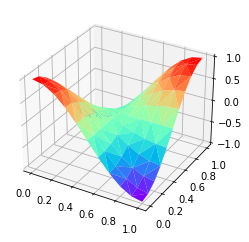

In [8]:
box=[0,1,0,1]
mesh=mf.boxmesh2d(box,nx=n,ny=n,meshtype='tri')
space=LagrangeFiniteElementSpace(mesh,p=p)

# 插值
uI=space.interpolation(pde.solution) # 是个有限元函数, 同时也是一个数组

print('uI[0:10]:',uI[0:10]) # 打印前面10个自由度的值

bc=np.array([1/3,1/3,1/3])
val0=uI(bc)
val1=uI.grad_value(bc) 

print('val0[0:10]:',val0[0:10])
print('val1[0:10]:',val1[0:10])

# 插值误差
error0=space.integralalg.L2_error(pde.solution,uI)
error1=space.integralalg.L2_error(pde.gradient,uI.grad_value)
print('L2:',error0,'H1:',error1)

fig=plt.figure()
axes=fig.gca(projection='3d')
uI.add_plot(axes,cmap='rainbow')
plt.show()

## example

In [30]:
import numpy as np 
from scipy.sparse.linalg import spsolve

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from fealpy.pde.poisson_2d import CosCosData
from fealpy.mesh import MeshFactory as mf
from fealpy.functionspace import LagrangeFiniteElementSpace
from fealpy.boundarycondition import DirichletBC

from fealpy.tools.show import showmultirate,show_error_table

In [31]:
# 参数
p=2
n=1

In [32]:
box=[0,1,0,1]
mesh=mf.boxmesh2d(box,nx=n,ny=n,meshtype='tri')
space=LagrangeFiniteElementSpace(mesh,p=p)
pde=CosCosData()

space.function()
display(len(space.function()),space.function())

run boxmesh2d with time: 0.014731400005985051


9

Function([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
# display(space.stiff_matrix(),space.stiff_matrix(q=p))

run serial_construct_matrix with time: 0.00592059999871708
run serial_construct_matrix with time: 0.005042800001319847


<121x121 sparse matrix of type '<class 'numpy.float64'>'
	with 761 stored elements in Compressed Sparse Row format>

<121x121 sparse matrix of type '<class 'numpy.float64'>'
	with 761 stored elements in Compressed Sparse Row format>

run boxmesh2d with time: 0.0012672000011662021
Step: 0
run serial_construct_matrix with time: 0.016182800000024145
Step: 1
run serial_construct_matrix with time: 0.07055940000100236
Step: 2
run serial_construct_matrix with time: 0.20236649999969814
Step: 3
run serial_construct_matrix with time: 0.6489122999992105


C:\Users\admin\AppData\Local\Temp/ipykernel_16476/4294341769.py:28: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=fig.gca(projection='3d')


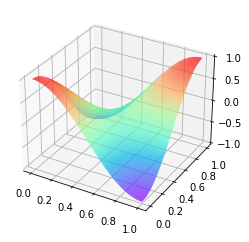

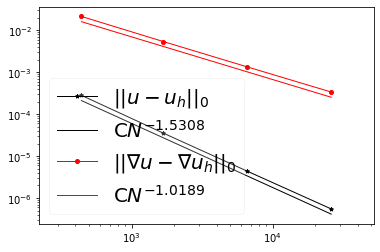

In [40]:
box=[0,1,0,1]
mesh=mf.boxmesh2d(box,nx=n,ny=n,meshtype='tri')
pde=CosCosData()

NDof=np.zeros(4)
errorMatrix =np.zeros((2,4))
errorType=['$||u-u_h||_0$','$||\\nabla u- \\nabla u_h||_0$']
for i in range(4):
    print('Step:',i)
    space=LagrangeFiniteElementSpace(mesh,p)
    NDof[i]=space.number_of_global_dofs()
    uh=space.function() # 返回一个有限元函数,初始自由度值是0,
    A=space.stiff_matrix()
    F=space.source_vector(pde.source)

    bc=DirichletBC(space,pde.dirichlet)
    A,F=bc.apply(A,F,uh)

    uh[:]=spsolve(A,F)

    errorMatrix[0,i]=space.integralalg.L2_error(pde.solution,uh.value)
    errorMatrix[1,i]=space.integralalg.L2_error(pde.gradient,uh.grad_value)
    
    if i<3:
        mesh.uniform_refine()

fig=plt.figure()
axes=fig.gca(projection='3d')
uh.add_plot(axes,cmap='rainbow')

k=0 # 算误差时 可以 把前那几个丢掉,比如从第k个开始算
showmultirate(plt,k,NDof,errorMatrix,errorType,propsize=20)

plt.show()

## 10_08_six_class

In [1]:
import numpy as np 
from scipy.sparse.linalg import spsolve

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from fealpy.pde.poisson_2d import CosCosData
from fealpy.mesh import MeshFactory as mf
from fealpy.functionspace import LagrangeFiniteElementSpace
from fealpy.boundarycondition import DirichletBC

from fealpy.tools.show import showmultirate,show_error_table

In [13]:
n=2
p=3
domain=[0,1,0,1]
mesh=mf.boxmesh2d(domain,nx=n,ny=n,meshtype='tri')
space=LagrangeFiniteElementSpace(mesh,p=p)

run boxmesh2d with time: 0.002144799999996394


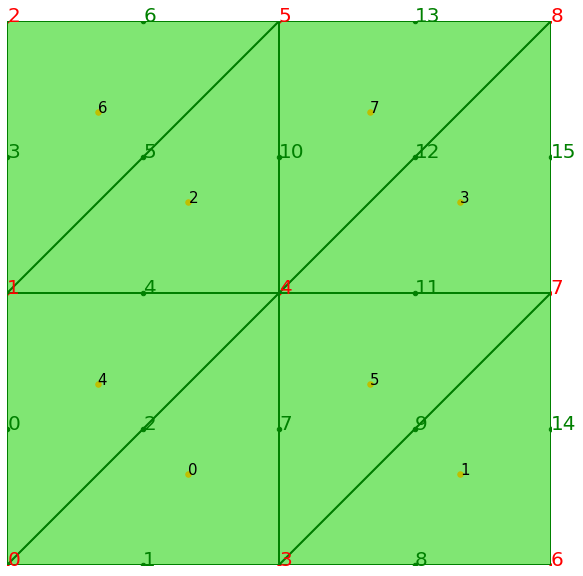

In [14]:
fig=plt.figure(figsize=(10,10))
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,showindex=True,fontsize=20)
mesh.find_edge(axes,showindex=True,fontsize=20)
mesh.find_cell(axes,showindex=True)
plt.show()

In [51]:
## 单元刚度矩阵的计算
# 假设已经定义好 mesh 和 space
qf=mesh.integrator(2,'cell') # 获取第一个积分公式
bcs,ws=qf.get_quadrature_points_and_weights() # (NQ,TD+1) 获取积分点重心坐标与权重
cellmeasure=mesh.entity_measure('cell') # (NC,)
gphi=space.grad_basis(bcs) # (NQ,NC,ldof,GD),计算奇函数在重心坐标处的梯度值

# 组装单元刚度矩阵,A.shape==(NC,ldof,ldof)
A=np.einsum('i,ijkl,ijml,j->jkm',ws,gphi,gphi,cellmeasure)

In [52]:
## 总体刚度矩阵的组装
from scipy.sparse import csr_matrix

gdof=space.number_of_global_dofs() # 全局自由度的个数

# (NC,ldof),cell2dof[i,j]= 存储第i个单元上的局部第j个自由度的全局编号 
cell2dof=space.cell_to_dof()

# (NC,ldof) --> (NC,ldof,1) --> (NC,ldof,ldof)
I=np.broadcast_to(cell2dof[:,:,None],shape=A.shape)

# (NC,ldof) --> (NC,1,ldof) --> (NC,ldof,ldof)
J=np.broadcast_to(cell2dof[:,None,:],shape=A.shape)

A=csr_matrix((A.flat,(I.flat,J.flat)),shape=(gdof,gdof))

In [55]:
print('gdof:\n',gdof)
print('cell2dof:\n',cell2dof)
print('I:\n',I)
print('J:\n',J)
print('A:\n',A)

gdof:
 49
cell2dof:
 [[ 3 23 12 24 41 11  4 13 14  0]
 [ 6 37 26 38 42 25  7 27 28  3]
 [ 4 29 18 30 43 17  5 19 20  1]
 [ 7 39 32 40 44 31  8 33 34  4]
 [ 1  9 17 10 45 18  0 14 13  4]
 [ 4 24 31 23 46 32  3 28 27  7]
 [ 2 15 22 16 47 21  1 20 19  5]
 [ 5 30 36 29 48 35  4 34 33  8]]
I:
 [[[ 3  3  3  3  3  3  3  3  3  3]
  [23 23 23 23 23 23 23 23 23 23]
  [12 12 12 12 12 12 12 12 12 12]
  [24 24 24 24 24 24 24 24 24 24]
  [41 41 41 41 41 41 41 41 41 41]
  [11 11 11 11 11 11 11 11 11 11]
  [ 4  4  4  4  4  4  4  4  4  4]
  [13 13 13 13 13 13 13 13 13 13]
  [14 14 14 14 14 14 14 14 14 14]
  [ 0  0  0  0  0  0  0  0  0  0]]

 [[ 6  6  6  6  6  6  6  6  6  6]
  [37 37 37 37 37 37 37 37 37 37]
  [26 26 26 26 26 26 26 26 26 26]
  [38 38 38 38 38 38 38 38 38 38]
  [42 42 42 42 42 42 42 42 42 42]
  [25 25 25 25 25 25 25 25 25 25]
  [ 7  7  7  7  7  7  7  7  7  7]
  [27 27 27 27 27 27 27 27 27 27]
  [28 28 28 28 28 28 28 28 28 28]
  [ 3  3  3  3  3  3  3  3  3  3]]

 [[ 4  4  4  4  4  4  4  4

In [ ]:
## 单元载荷向量的计算
phi=space.basis(bcs)